# Solution for ML challenge:
https://www.hackerearth.com/challenge/competitive/machine-learning-challenge-one/

original dataset:
https://www.hackerearth.com/problem/machine-learning/bank-fears-loanliness/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

%matplotlib inline

from sklearn.model_selection import cross_val_score

# Some useful functions

In [3]:
# This function replaces variables in a dataframe acording to a map determined by the dictionary
# passed to the second argument:

def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)
    return colCoded

In [4]:
# Replaces a column of a dataframe to a new  column determined by the dictionary passed to its third argument.
def to_numeric(df, colname, dictionary, new_colname) :
    df.loc[:,new_colname] = coding(df.loc[:,colname], dictionary)
    del df[colname]
    #df.drop(colname, axis=1, inplace=True)

# Exploratory Data Analysis

In [5]:
raw_data = pd.read_csv('train_indessa.csv')
raw_test = pd.read_csv('test_indessa.csv')

In [6]:
raw_data.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

In [7]:
raw_data.dtypes

member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
batch_enrolled                  object
int_rate                       float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
pymnt_plan                      object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                 

# Data Transformation

### 1. Saving `loan_status` in to `target` and deleting 

In [8]:
raw_data['istrain']=1
raw_test['istrain']=0
#1
target=raw_data['loan_status']
del raw_data['loan_status']

### 2. Joining test and training data into `alldata`

In [9]:

frames = [raw_data, raw_test]
alldata = pd.concat(frames)

# Feature Engineering
## Transforming some cathegorical features into numerical


## `sub_grade`

In [10]:
alldata["sub_grade"].unique()

array(['E3', 'B4', 'A4', 'D5', 'B2', 'A5', 'B1', 'C4', 'D4', 'C3', 'D2',
       'A3', 'A1', 'C1', 'D1', 'E2', 'B3', 'A2', 'C2', 'C5', 'E4', 'D3',
       'B5', 'F2', 'F5', 'E1', 'E5', 'F4', 'F1', 'F3', 'G4', 'G3', 'G5',
       'G1', 'G2'], dtype=object)

In [11]:
dict_sub_grade={'A1':1,'A2':2, 'A3':3,'A4':4,'A5':5,
    'B1':6, 'B2':7, 'B3':8, 'B4':9, 'B5':10, 'C1':11, 'C2':12, 'C3':13, 'C4':14, 'C5':15,
    'D1':16, 'D2':17, 'D3':18, 'D4':19, 'D5':20, 'E1':21, 'E2':22, 'E3':23, 'E4':24, 'E5':25,
    'F1':26, 'F2':27, 'F3':28, 'F4':29, 'F5':30,'G1':31, 'G2':32, 'G3':33, 'G4':34, 'G5':35}

Let's replace the feature `sub_grade` by `newgrade` using the map of `dict_sub_grade`:

In [12]:
to_numeric(alldata, "sub_grade", dict_sub_grade, "new_grade")


In [14]:
alldata.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'istrain', 'new_grade'],
      dtype='object')

Let's check the correlation between `newgrade` and interest rate:

In [15]:
gi1=alldata.ix[:,'new_grade']
gi2=alldata.ix[:,'int_rate']

In [16]:
np.cov(gi1,gi2)

array([[ 42.15929519,  27.80612114],
       [ 27.80612114,  19.20076204]])

## `emp_length`
Let's do the same with feature `emp_length`:

In [17]:
np.unique(alldata['emp_length'])

array(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year', 'n/a'], dtype=object)

In [18]:
dict_emp_length={'1 year':1,'10+ years':10,'2 years':2,
        '3 years':3, '4 years':4, '5 years':5, '6 years':6, '7 years':7,'8 years':8,
        '9 years':9, '< 1 year':0.5, 'n/a':0}

In [19]:

to_numeric(alldata, 'emp_length', dict_emp_length, "new_el")

## `term`
To be able to use in feature engineering , we will transform the feature `term` into numeric as well.

In [20]:
alldata["term"].unique()

array(['36 months', '60 months'], dtype=object)

In [21]:
dict_term={'36 months':36,'60 months':60 }
to_numeric(alldata, 'term', dict_term, "new_term")

### Removing some features

In [22]:
badfeatures=[] 
#badfeatures=[]
for features in badfeatures:
    del alldata[features]

## Removing categorical features with too many values

### Printing numbers of catherories of cathegorical variables

In [24]:
nofcategories=dict()
for col in alldata.columns:
    if alldata.ix[:,col].dtypes == 'object':
        ncats=len(set(alldata[col]))
        nofcategories[col]=ncats
print(nofcategories) 

{'batch_enrolled': 208, 'grade': 7, 'emp_title': 289208, 'home_ownership': 6, 'verification_status': 3, 'pymnt_plan': 2, 'desc': 116825, 'purpose': 14, 'title': 61453, 'zip_code': 935, 'addr_state': 51, 'initial_list_status': 2, 'application_type': 2, 'verification_status_joint': 4, 'last_week_pay': 98}


In [25]:
alldata.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'batch_enrolled', 'int_rate', 'grade', 'emp_title', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type',
       'verification_status_joint', 'last_week_pay', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'istrain',
       'new_grade', 'new_el', 'new_term'],
      dtype='object')

In [26]:
alldata['home_ownership'].unique()

array(['OWN', 'MORTGAGE', 'RENT', 'OTHER', 'NONE', 'ANY'], dtype=object)

### Removing cathegories: 
We remove cathegories with too many possible values to avoid overfitting.

In [27]:

for col in alldata.columns:
    if alldata.ix[:,col].dtypes == 'object':    
        ncats=len(set(alldata[col]))
        if ncats > 51:
            del alldata[col]

In [28]:
# Removing columns whics contains "<" ,">", or "," from dataframe because these are usually contains lengthy html codes
# or lengthy notes which are not recurring
for name in alldata.columns:
    if (name.find("<")>0 or name.find(">")>0 or name.find(",")>0 or len(name)>20):
        del alldata[name]

# Imputing

In [30]:
for col in alldata.columns:
    if alldata[col].isnull().sum()>0:
        print(col, alldata[col].isnull().sum())

annual_inc 4
delinq_2yrs 29
inq_last_6mths 29
open_acc 29
pub_rec 29
revol_util 502
total_acc 29
acc_now_delinq 29
tot_coll_amt 70276
tot_cur_bal 70276
total_rev_hi_lim 70276


In [31]:
alldata["delinq_2yrs"].unique()

array([  0.,   3.,   1.,   4.,   2.,   5.,  13.,   6.,  10.,   9.,  11.,
        14.,   7.,   8.,  12.,  18.,  19.,  15.,  27.,  16.,  nan,  24.,
        30.,  21.,  17.,  26.,  22.,  29.,  39.,  20.])

In [32]:
alldata["delinq_2yrs"].median()

0.0

/media/badicst/875664ae-1937-4e8e-a7f3-43b9b3e28b21/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


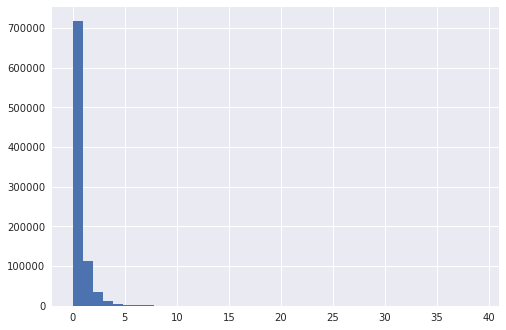

In [33]:
alldata["delinq_2yrs"].hist(bins=40)

/media/badicst/875664ae-1937-4e8e-a7f3-43b9b3e28b21/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


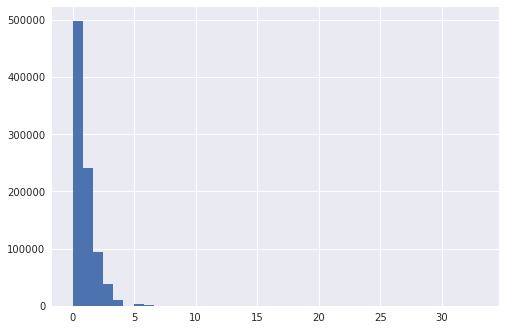

In [34]:
alldata["inq_last_6mths"].hist(bins=40)

/media/badicst/875664ae-1937-4e8e-a7f3-43b9b3e28b21/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


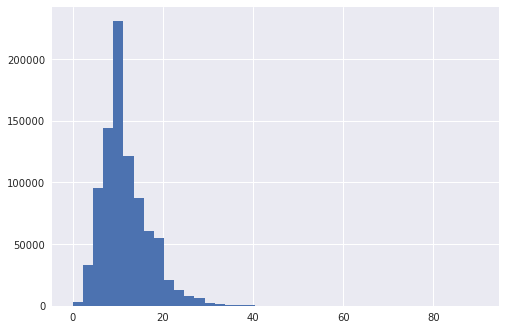

In [35]:
alldata["open_acc"].hist(bins=40)

In [36]:
alldata["open_acc"].median()

11.0

/media/badicst/875664ae-1937-4e8e-a7f3-43b9b3e28b21/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


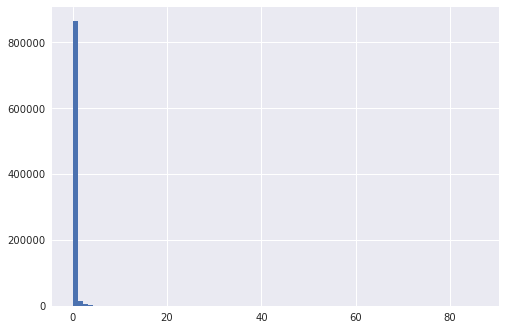

In [37]:
alldata["pub_rec"].hist(bins=80)

/media/badicst/875664ae-1937-4e8e-a7f3-43b9b3e28b21/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


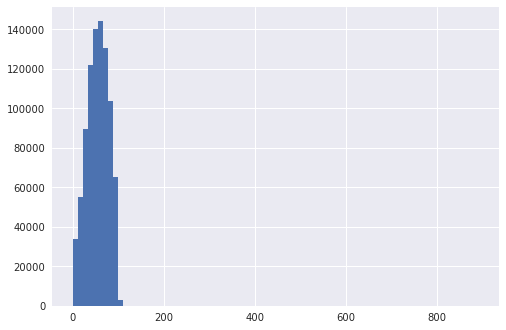

In [38]:
alldata["revol_util"].hist(bins=80)

/media/badicst/875664ae-1937-4e8e-a7f3-43b9b3e28b21/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


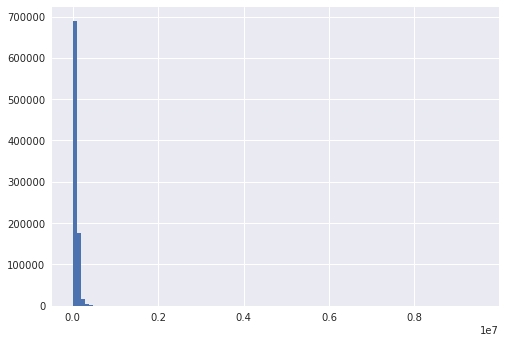

In [39]:
alldata["annual_inc"].hist(bins=100)

/media/badicst/875664ae-1937-4e8e-a7f3-43b9b3e28b21/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


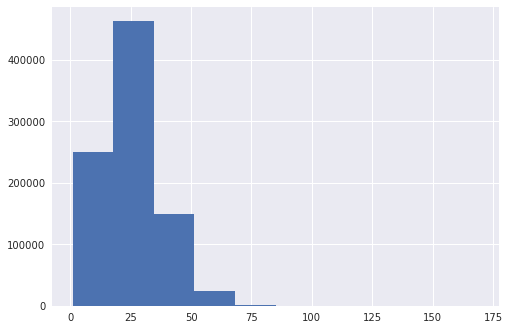

In [40]:
alldata["total_acc"].hist()

In [41]:
for col in alldata.columns:
    if alldata.ix[:,col].dtypes == 'float64' or alldata.ix[:,col].dtypes == 'int64':
        print(col, end=", ")
        

member_id, loan_amnt, funded_amnt, funded_amnt_inv, int_rate, annual_inc, dti, delinq_2yrs, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, total_rec_int, total_rec_late_fee, recoveries, acc_now_delinq, tot_coll_amt, tot_cur_bal, total_rev_hi_lim, istrain, new_grade, new_el, new_term, 

In [42]:
imputing_median=["delinq_2yrs","inq_last_6mths","open_acc",
                 "pub_rec","annual_inc", "revol_util","total_acc", "acc_now_delinq",
                 "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim"]

In [43]:
for col in imputing_median:
    if alldata.ix[:,col].dtypes == 'object':
        print(col, end=", ")

#### Imputing missing values of columns contained in the list `imputing_median`:

In [44]:
for col in imputing_median:
    alldata[col].fillna((alldata[col].median()), inplace=True)

In [45]:
# Checking the result of imputation:
for i in alldata.columns: 
    print(alldata.ix[:,i].isnull().sum())
    pass

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


## Some new features:

In [46]:
alldata["new1"]=alldata["annual_inc"]/alldata["loan_amnt"]



### One-hot encoding 
#### (transforming the remaining cathegorical data into numerical) 

In [47]:
alldata=pd.get_dummies(alldata)

In [49]:
data=alldata[alldata["istrain"]==1]
test=alldata[alldata["istrain"]==0]

### Saving

In [52]:
#before saving insert back `loan_status`   
data.ix[:,'loan_status']=target

/media/badicst/875664ae-1937-4e8e-a7f3-43b9b3e28b21/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [53]:
data.to_csv("data_transformed.csv", index=False)
test.to_csv("test_transformed.csv", index=False)

### Deleting id column and saving id column of test set to `submit_file`:

In [55]:
data = pd.read_csv("data_transformed.csv")
test = pd.read_csv("test_transformed.csv")

In [56]:
# del data['member_id'] # `member_id` contains important information concerning time
submit_file=test[['member_id']]
#del test['member_id']


In [57]:
target=data['loan_status']
del data['loan_status']

# Validation

In [60]:

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0)

In [61]:
rfloan = RandomForestClassifier(n_estimators=60, n_jobs=-1,  max_features=30, class_weight="balanced_subsample")

In [62]:
#rfloan.fit(X_train, y_train) #, min_samples_leaf=30 max_features=30,

In [62]:
import time
from time import gmtime, strftime

In [63]:
print(strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime()))
#CV_score=np.mean(cross_val_score(rfloan, X_train, y_train, cv=5, scoring='roc_auc'))
CV_score=np.mean(cross_val_score(rfloan, X_train, y_train, cv=5, scoring='roc_auc'))
print(CV_score)
print(strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime()))


Sat, 08 Apr 2017 09:02:58 +0000
0.939154385603
Sat, 08 Apr 2017 09:13:54 +0000


# Testing

In [54]:
#rfloan.fit(X_train, y_train).score(X_test, y_test)

In [64]:
rfloan.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features=30,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
prediction=rfloan.predict_proba(X_test)
prediction=np.array(prediction[:,1])



In [65]:
true_labels=np.array(y_test.to_frame()["loan_status"])

In [67]:



fpr, tpr, thresholds = metrics.roc_curve(true_labels, prediction, pos_label=1)

metrics.auc(fpr, tpr)

0.94055496692284368

# Predicting

In [68]:
print(strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime()))
rfloan.fit(X_train, y_train)
prediction=rfloan.predict_proba(test)
prediction1=prediction[:,1]

Sat, 08 Apr 2017 09:16:40 +0000


In [70]:
prediction1=prediction1+0.0000001
submit_file['loan_status']=prediction1
submit_file.to_csv("submissionproba100.csv", index=False) 


/media/badicst/875664ae-1937-4e8e-a7f3-43b9b3e28b21/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
